# Datos sobre COVID-19 (coronavirus) 

## 1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?

<p align="justify">
Este set de datos es una colección de los datos COVID-19 mantenidos por <a href="https://ourworldindata.org/coronavirus">Nuestro Mundo en Datos.</a> 
 Se actualiza diariamente e incluye datos sobre casos confirmados, muertes, hospitalizaciones, pruebas y vacunas, así como otras variables de interés potencial.
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2. Descripción del set de datos 

In [ ]:
descripcion = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv")

In [ ]:
descripcion[["column", "description"]]

,column,description
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Continent of the geographical location
2,location,Geographical location
3,date,Date of observation
4,total_cases,Total confirmed cases of COVID-19
5,new_cases,New confirmed cases of COVID-19
6,new_cases_smoothed,New confirmed cases of COVID-19 (7-day smoothed)
7,total_deaths,Total deaths attributed to COVID-19
8,new_deaths,New deaths attributed to COVID-19
9,new_deaths_smoothed,New deaths attributed to COVID-19 (7-day smoothed)


## 3. Limpieza de los datos.

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UOC/Visualizacion/owid-covid-data.csv")

In [ ]:
df_train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90314,ZWE,Africa,Zimbabwe,2021-05-17,38572.0,12.0,19.857,1582.0,0.0,0.857,2595.182,0.807,1.336,106.439,0.000,0.058,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1834.0,525058.0,35.327,0.123,1845.0,0.124,0.011,92.9,tests performed,814258.0,591808.0,222450.0,17311.0,17658.0,5.48,3.98,1.50,1188.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90315,ZWE,Africa,Zimbabwe,2021-05-18,38595.0,23.0,21.000,1583.0,1.0,0.571,2596.729,1.547,1.413,106.507,0.067,0.038,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154.0,527212.0,35.472,0.145,1850.0,0.124,0.011,88.1,tests performed,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90316,ZWE,Africa,Zimbabwe,2021-05-19,38612.0,17.0,20.857,1583.0,0.0,0.571,2597.873,1.144,1.403,106.507,0.000,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.0,530325.0,35.681,0.209,2032.0,0.137,0.010,97.4,tests performed,844684.0,605556.0,239128.0,12730.0,16331.0,5.68,4.07,1.61,1099.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,

In [ ]:
df_train['date'] = df_train['date'].astype('datetime64[ns]')

#### Evaluación de datos faltantes

Los valores faltantes se convierten al valor predeterminado de Python. Utilizamos las funciones integradas de Python para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:
* .isnull()
* .notnull()

La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho datos faltantes.

In [ ]:
missing_data = df_train.isnull()

"Verdadero" significa valor perdido, mientras que "Falso" significa valor no perdido

In [ ]:
missing_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False


#### Cantidad de valores faltantes por columna

In [ ]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent
weekly_icu_admissions,89490,0.990821
weekly_icu_admissions_per_million,89490,0.990821
weekly_hosp_admissions,88876,0.984023
weekly_hosp_admissions_per_million,88876,0.984023
people_fully_vaccinated_per_hundred,81829,0.906000
people_fully_vaccinated,81829,0.906000
icu_patients,81158,0.898571
icu_patients_per_million,81158,0.898571
new_vaccinations,80389,0.890056
people_vaccinated,79286,0.877844


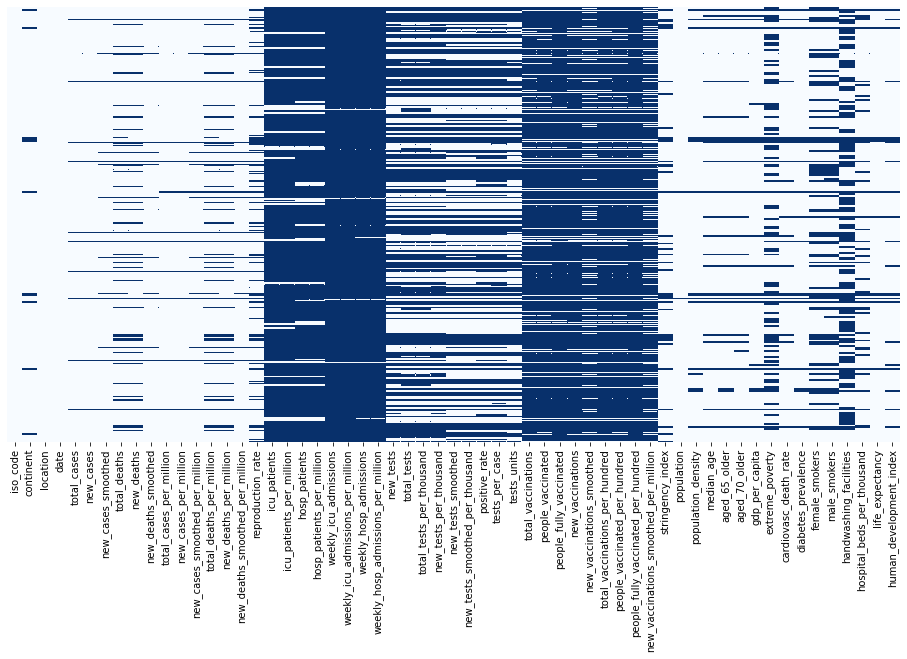

In [ ]:
plt.subplots(figsize=(16, 8))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar = False, cmap = "Blues")
plt.show()

#### ¿Cómo lidiar con los datos faltantes?

<ol>
    <li>Eliminar datos<br>
        a. Eliminar toda la fila<br>
        b. Eliminar toda la columna
    </li>
    <li>reemplazar datos<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la frecuencia<br>
        c. Reemplazar en función de otras funciones
    </li>
</ol>

<p align="justify">
Tenemos cierta libertad para elegir el método para reemplazar datos, sin embargo, algunos métodos pueden parecer más razonables que otros. Dado que este data set muestra una colección de casos confirmados, muertes, hospitalizaciones, pruebas y vacunas, así como otras variables de interés potencial, del COVID-19 a nivel mundial lo mejor será reemplazar las variables numéricas por el numero cero y las categorías por la de mayor frecuencia
</p>

##### **Variables numéricas**

In [ ]:
var_num = df_train._get_numeric_data()

In [ ]:
for v in var_num:
   df_train[v].replace(np.nan, 0, inplace=True)   

##### **Variables categóricas**

In [ ]:
data_vars = df_train.columns.values.tolist()

In [ ]:
var_cat = [v for v in data_vars if v not in var_num]

In [ ]:
for v in var_cat:
   df_train[v].replace(np.nan, df_train[v].value_counts().idxmax(), inplace=True)

#### Comprobamos si existen valores faltantes

In [ ]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent


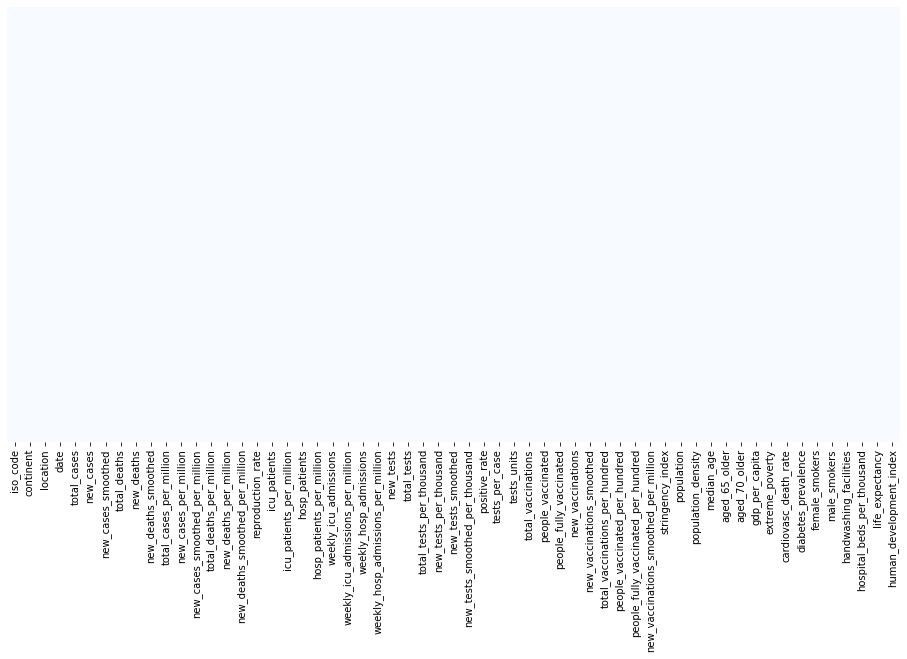

In [ ]:
plt.subplots(figsize=(16, 8))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar = False, cmap = "Blues")
plt.show()

In [ ]:
df_train["year_month"] = pd.to_datetime(df_train["date"]).dt.to_period('M')
df_train['year_month']= df_train['year_month'].astype(str)

## 4. Visualizaciones.

#### Suma total de casos confirmados de COVID-19 por mes

In [ ]:
df = df_train.groupby(['year_month'])[['total_cases']].sum('total_cases').reset_index()

In [ ]:
fig = px.bar(df, y='total_cases', x='year_month', text='total_cases', color='year_month'
             , title="Suma total de casos confirmados de COVID-19 por meses"
             , labels=dict(year_month="FECHA", total_cases="Total de casos confirmados")
             ,hover_data=['year_month']).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.update_layout(xaxis_tickangle=-90)
fig.show();

#### TOP de los 10 países principales afectados, por total de muertes atribuidas a COVID-19

In [ ]:
df = df_train.groupby(['location'])[['total_deaths']].sum('total_deaths').reset_index().sort_values(by=['total_deaths'], ascending=False)

In [ ]:
top_10 = df.head(10)

In [ ]:
fig = px.bar(top_10, y='total_deaths', x='location', text='total_deaths', color='location'
             , title="TOP de los 10 países principales afectados, por total de muertes atribuidas a COVID-19"
             , labels=dict(location="País", total_deaths="Total de muertes")
             ,hover_data=['location']).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.update_layout(xaxis_tickangle=-90)
fig.show();


In [ ]:
fig = px.line(top_10, x="location", y="total_deaths", title='TOP de los 10 países principales afectados, por total de muertes atribuidas a COVID-19 (gráfico de líneas)'
              , labels=dict(location="País", total_deaths="Total de muertes"))
fig.update_xaxes(type='category')
fig.update_layout(xaxis_tickangle=-90)
fig.show()


#### Gráfico de líneas que muestra la proporción mujeres que fuman vs la proporción de hombres que fuman

In [ ]:
df = df_train.groupby(['continent'])[['female_smokers', 'male_smokers']].sum(['female_smokers', 'male_smokers']).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['continent'], y=df['female_smokers'],
                    mode='lines',
                    name='Proporción de mujeres que fuman'))
fig.add_trace(go.Scatter(x=df['continent'], y=df['male_smokers'],
                    mode='lines',
                    name='Proporción de hombres que fuman'))
fig.update_xaxes(type='category')
fig.update_layout(xaxis_tickangle=-90)

fig.update_layout(title='Gráfico de líneas que muestra la proporción mujeres que fuman vs la proporción de hombres que fuman',
                   xaxis_title='Continente',
                   yaxis_title='Fumadores')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.75
))

fig.show()

#### Gráfico de barras que muestra el total de dosis de vacunación vs el numero total de personas que al menos recibieron una dosis vs el numero total de personas que recibieron todas las dosis

In [ ]:
df = (df_train.groupby(['continent'])[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]
     .sum(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']).reset_index())

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['total_vaccinations'],
    y=df['continent'],
    name='Número total de dosis de vacunación COVID-19 administradas',
    orientation='h',
    marker=dict(
        color='rgba(119,178,50,0.6)',
        line=dict(color='rgba(119,178,50, 1.0)', width=1)
    )
))

fig.add_trace(go.Bar(
    x=df['people_vaccinated'],
    y=df['continent'],
    name='Número total de personas que recibieron al menos una dosis de vacuna',
    orientation='h',
    marker=dict(
        color='rgba(248,153,54, 0.6)', 
        line=dict(color='rgba(248,153,54, 1.0)', width=1)
    )
))

fig.add_trace(go.Bar(
    x=df['people_fully_vaccinated'],
    y=df['continent'],
    name='Número total de personas que recibieron todas las dosis prescritas',
    orientation='h',
    marker=dict(
        color='rgba(51,170,225, 0.6)',
        line=dict(color='rgba(51,170,225, 1.0)', width=1)
    )
))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.53
))

fig.update_layout(title=('Total de dosis de vacunación '  +
                          'vs personas que al menos recibieron una dosis ' +
                           'vs personas que recibieron todas las dosis'),
                   xaxis_title='Numero de personas',
                   yaxis_title='Continente')

fig.update_layout(barmode='group')
fig.show()

#### Gráfico circular de la población que vive en pobreza extrema por continente

In [ ]:
df = (df_train.groupby(['continent'])[['extreme_poverty']]
     .sum(['extreme_poverty']).reset_index())

In [ ]:
fig = px.pie(df, values='extreme_poverty', names='continent', title='Proporción de la población que vive en pobreza extrema')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Gráfico de mapa que muestra la proporción de la población mayor de 70 años en 2015

In [ ]:
df = (df_train.groupby(['continent','iso_code', 'location'])[['aged_70_older']]
     .sum(['aged_70_older']).reset_index())

In [ ]:
fig = px.scatter_geo(df, locations="iso_code",
                     color="continent", 
                     hover_name="location", 
                     size="aged_70_older", 
                     text="aged_70_older",
                     projection="natural earth",
                     hover_data=['continent']).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig.update_layout(title='Proporción de la población mayor de 70 años en 2015')
fig.update_traces(marker=dict(size=5))
fig.show()

#### Gráfico de mapa que muestra la tasa de mortalidad por enfermedad cardiovascular en 2017

In [ ]:
df = (df_train.groupby(['continent','iso_code', 'location'])[['cardiovasc_death_rate']]
     .sum(['cardiovasc_death_rate']).reset_index())

In [ ]:
fig = px.scatter_geo(df, locations="iso_code",
                     color="continent", 
                     hover_name="location", 
                     size="cardiovasc_death_rate", 
                     text="cardiovasc_death_rate",
                     projection="natural earth",
                     hover_data=['continent']).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig.update_layout(title='Tasa de mortalidad por enfermedad cardiovascular en 2017')
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
df_train.to_csv('owid-covid-data.csv', sep=";")